In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
# file management imports
import os  ### only for count of images from dir, can be removed later
import tensorflow as tf
# model imports for deep learning
import keras
from keras import Input, layers, models, regularizers, activations
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, accuracy_score
import cv2
from sklearn import metrics
#for confusion matrix
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report, confusion_matrix
import itertools
from sklearn.metrics import ConfusionMatrixDisplay

#for displaying images when predicting class
from PIL import Image, ImageOps
#for rounding up fitting model for steps_per_epoch
import math

from keras.models import load_model
from google.colab import drive


In [ ]:
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# Path to the folder containing this Notebook
! cd "/content/drive/My Drive/Colab_Notebooks/"
# Path to the zipped dataset
! unzip "/content/drive/My Drive/Colab_Notebooks/IMGDB_data_8_classes.zip"

In [ ]:
train_dir = "/content/IMGDB_data/train/"
test_dir = "/content/IMGDB_data/test/"


#Location of train and test sets of CUBO
train_dir_CUBO = train_dir+"CUBO"
test_dir_CUBO = test_dir+"CUBO"
#Location of train and test sets of DEC
train_dir_DEC = train_dir+"DEC"
test_dir_DEC = test_dir+"DEC"
#Location of train and test sets of DODECA
train_dir_DODECA = train_dir+"DODECA"
test_dir_DODECA = test_dir+"DODECA"
#Location of train and test sets of FCC_CUBE
train_dir_FCC_CUBE = train_dir+"FCC_CUBE"
test_dir_FCC_CUBE = test_dir+"FCC_CUBE"
#Location of train and test sets of ICO
train_dir_ICO = train_dir+"ICO"
test_dir_ICO = test_dir+"ICO"
#Location of train and test sets of OH
train_dir_OH = train_dir+"OH"
test_dir_OH = test_dir+"OH"
#Location of train and test sets of TD
train_dir_TD = train_dir+"TD"
test_dir_TD = test_dir+"TD"
#Location of train and test sets of TPT
train_dir_TPT = train_dir+"TPT"
test_dir_TPT = test_dir+"TPT"


In [ ]:
#display image smaller (for checking manually)
def display_image(image_directory):
    im = image.load_img(image_directory)
    fig, ax = plt.subplots(figsize=(10,6))
    # displaying the image with figsize
    ax.imshow(im)

datagen = ImageDataGenerator(
    rescale=1./255,
    horizontal_flip=True,
    vertical_flip=True,
    rotation_range=45
)

In [ ]:
# classes= ['Circle','Square','Triangle']
batch_size = 32

#making tensorflow for training data
training_data = datagen.flow_from_directory(directory= train_dir,       # dataset
                                                   target_size = (256,256),      # desired dimensions for the images
                                                   batch_size = batch_size,    # it will be run in groups of(batch_size specified above)
                                                   class_mode = 'categorical', # type of classifiaction
                                                   color_mode='grayscale'
                                                   )
#making tensorflow for testing data
testing_data = datagen.flow_from_directory(directory= test_dir,
                                                   target_size = (256,256),
                                                   batch_size = batch_size,
                                                   class_mode = 'categorical',
                                                   color_mode='grayscale'
                                                   )
training_data.image_shape

total_training_size = len(os.listdir(train_dir_CUBO))+len(os.listdir(train_dir_DEC))+len(os.listdir(train_dir_DODECA))+len(os.listdir(train_dir_FCC_CUBE))+len(os.listdir(train_dir_ICO))+len(os.listdir(train_dir_OH))+len(os.listdir(train_dir_TD))+len(os.listdir(train_dir_TPT))
total_testing_size = len(os.listdir(test_dir_CUBO))+len(os.listdir(test_dir_DEC))+len(os.listdir(test_dir_DODECA))+len(os.listdir(test_dir_FCC_CUBE))+len(os.listdir(test_dir_ICO))+len(os.listdir(test_dir_OH))+len(os.listdir(test_dir_TD))+len(os.listdir(test_dir_TPT))



Found 7216 images belonging to 8 classes.
Found 800 images belonging to 8 classes.


In [ ]:
input = Input(shape=(256, 256, 1))

x = layers.Conv2D(16, kernel_size=(3, 3), activation='relu', padding = 'same',
                  input_shape=(256, 256, 1), kernel_regularizer=regularizers.L2(0.01))(input)
x = layers.Conv2D(16, kernel_size=(3, 3), activation='relu', padding = 'same')(x)
x = layers.MaxPool2D((2, 2), strides = 2)(x)

x = layers.Conv2D(32, kernel_size=(3, 3), activation='relu', padding = 'same')(x)
x = layers.Conv2D(32, kernel_size=(3, 3), activation='relu', padding = 'same')(x)
x = layers.MaxPool2D((2, 2), strides = 2)(x)

x = layers.Conv2D(64, kernel_size=(3, 3), activation='relu', padding = 'same')(x)
x = layers.Conv2D(64, kernel_size=(3, 3), activation='relu', padding = 'same')(x)
x = layers.Conv2D(64, kernel_size=(3, 3), activation='relu', padding = 'same')(x)
x = layers.MaxPool2D((2, 2), strides = 2)(x)


x = layers.Flatten()(x)
x = layers.Dense(512, activation='relu')(x)
x = layers.Dropout(0.5)(x)
x = layers.Dense(512, activation='relu')(x)
x = layers.Dropout(0.5)(x)
x = layers.Dense(8, activation='softmax')(x)

model = models.Model(input, x)


model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=["accuracy"])
model.summary()

Model: "model_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_8 (InputLayer)        [(None, 256, 256, 1)]     0         
                                                                 
 conv2d_61 (Conv2D)          (None, 256, 256, 16)      160       
                                                                 
 conv2d_62 (Conv2D)          (None, 256, 256, 16)      2320      
                                                                 
 max_pooling2d_25 (MaxPooli  (None, 128, 128, 16)      0         
 ng2D)                                                           
                                                                 
 conv2d_63 (Conv2D)          (None, 128, 128, 32)      4640      
                                                                 
 conv2d_64 (Conv2D)          (None, 128, 128, 32)      9248      
                                                           

In [ ]:
history = model.fit(training_data,
                    validation_data=testing_data,
                    epochs=40)

Epoch 1/40
226/226 [==============================] - 41s 170ms/step - loss: 0.7169 - accuracy: 0.7578 - val_loss: 0.3334 - val_accuracy: 0.8838
Epoch 2/40
226/226 [==============================] - 38s 167ms/step - loss: 0.2729 - accuracy: 0.9123 - val_loss: 0.2424 - val_accuracy: 0.8963
Epoch 3/40
226/226 [==============================] - 39s 170ms/step - loss: 0.2061 - accuracy: 0.9274 - val_loss: 0.1828 - val_accuracy: 0.9275
Epoch 4/40
226/226 [==============================] - 40s 175ms/step - loss: 0.1939 - accuracy: 0.9342 - val_loss: 0.1960 - val_accuracy: 0.9187
Epoch 5/40
226/226 [==============================] - 39s 171ms/step - loss: 0.1609 - accuracy: 0.9425 - val_loss: 0.1795 - val_accuracy: 0.9312
Epoch 6/40
226/226 [==============================] - 38s 169ms/step - loss: 0.1475 - accuracy: 0.9460 - val_loss: 0.1530 - val_accuracy: 0.9388
Epoch 7/40
226/226 [==============================] - 39s 172ms/step - loss: 0.1236 - accuracy: 0.9543 - val_loss: 0.1626 - val_ac

In [ ]:
accuracy = history.history['accuracy'][1:]
loss = history.history['loss'][1:]
val_accuracy = history.history['val_accuracy'][1:]
val_loss = history.history['val_loss'][1:]

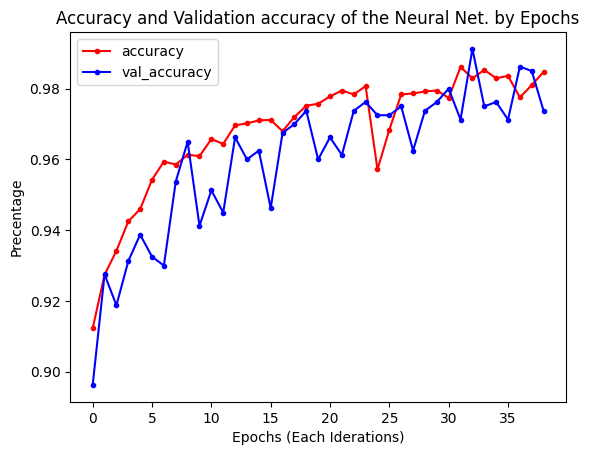

In [ ]:
#plot accuracy for model
plt.plot(range(len(accuracy)), accuracy, 'r', marker= '.', label = 'accuracy')
#plot loss for model
plt.plot(range(len(val_accuracy)), val_accuracy, 'b', marker= '.', label = 'val_accuracy')
plt.xlabel('Epochs (Each Iderations)')
plt.ylabel('Precentage')
plt.title('Accuracy and Validation accuracy of the Neural Net. by Epochs')
plt.legend()

In [ ]:
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion Matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

In [ ]:
# predicted_classes = np.argmax(predictions, axis=1)
true_classes = testing_data.classes
class_labels = list(testing_data.class_indices.keys())
print(class_labels)
print(true_classes)
testing_data
predictions = model.predict(testing_data)
predicted_classes = np.argmax(predictions, axis=1)

['CUBO', 'DEC', 'DODECA', 'FCC_CUBE', 'ICO', 'OH', 'TD', 'TPT']
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3
 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3
 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 4 4 4 4 4 4 4
 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4
 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4

In [ ]:
yhat = []

def evaluate_dir(directory, label):
    files = os.listdir(directory)
    count = 0
    for file in files:
        if file.endswith(".jpg") or file.endswith(".png"):
            img = cv2.imread(os.path.join(directory, file), cv2.IMREAD_GRAYSCALE)
            try:
                img = cv2.resize(img, (256, 256))
                yhat.append(np.argmax(model.predict(np.expand_dims(img, [0, -1]))))
                count += 1
            except:
                print(file)

    print(f"Count: {count}")

evaluate_dir(test_dir_CUBO, 0)
evaluate_dir(test_dir_DEC, 1)
evaluate_dir(test_dir_DODECA, 2)
evaluate_dir(test_dir_FCC_CUBE, 3)
evaluate_dir(test_dir_ICO, 4)
evaluate_dir(test_dir_OH, 5)
evaluate_dir(test_dir_TD, 6)
evaluate_dir(test_dir_TPT, 7)


1/1 [==============================] - 0s 17ms/step
Count: 100
1/1 [==============================] - 0s 19ms/step
Count: 100
1/1 [==============================] - 0s 18ms/step
Count: 100
1/1 [==============================] - 0s 18ms/step
Count: 100
1/1 [==============================] - 0s 19ms/step
Count: 100
1/1 [==============================] - 0s 20ms/step
Count: 100
1/1 [==============================] - 0s 19ms/step
Count: 100
1/1 [==============================] - 0s 18ms/step
Count: 100


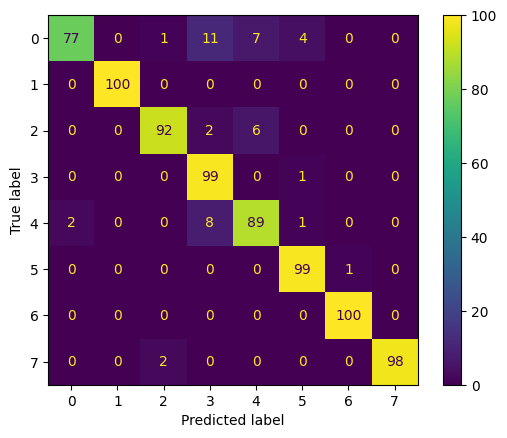

In [ ]:
cf = confusion_matrix(testing_data.labels, yhat)
ConfusionMatrixDisplay(cf).plot()
plt.show()

In [ ]:
def show_xplique(model,img,label,total_label,alpha):
  X = np.squeeze(img, axis = 0)
  explainer1 = GradientInput(model)
  explainer2 = GradCAM(model)
  Y = []

  labels = tf.keras.utils.to_categorical(label,total_label)
  Y.append(labels)

  explanations1 = explainer1(img, Y)
  to_show1 = np.squeeze(explanations1,axis=0)
  explanations2 = explainer2(img, Y)
  to_show2 = np.squeeze(explanations2,axis=0)

  plt.figure()
  fig, ax = plt.subplots(figsize=(10,6))
  # displaying the image with figsize
  ax.imshow(X)
  plt.imshow(to_show1, cmap="jet", alpha=alpha)

  plt.figure()
  fig, ax = plt.subplots(figsize=(10,6))
  # displaying the image with figsize
  ax.imshow(X)
  plt.imshow(to_show2, cmap="jet", alpha=alpha)

def testing_image(image_directory,model):

#     predicted_classes=

  # loading testing image with the target size for the image
  test_image = image.load_img(image_directory, target_size = (256,256),color_mode='grayscale',)
  # makes sure the image is in RGB (converts all images to have only 3 color channels, png images have 4 color channels)
  # test_image = test_image.convert(mode='grayscale')
  # converts image into an array
  test_image = tf.keras.preprocessing.image.img_to_array(test_image)
  # expands array (from converted image) with a new dimension (for classifying values)
  test_image = np.expand_dims(test_image, axis = 0)
  test_image = tf.keras.applications.inception_v3.preprocess_input(test_image)
  # making prediction based on test_image and labeling it results
  result = model.predict(x = test_image)
  # printing predictions
  print(result)

  #display image smaller (for checking manually)
  display_image(image_directory)

  return result, test_image
#display image smaller (for checking manually)
def display_image(image_directory):
  im = image.load_img(image_directory)
  fig, ax = plt.subplots(figsize=(10,6))
  # displaying the image with figsize
  ax.imshow(im)

1/1 [==============================] - 0s 42ms/step


[[3.2747541e-10 5.1297735e-07 4.4863043e-07 9.9999905e-01 2.9759589e-10
  1.2758041e-12]]
['CUBO', 'DEC', 'DODECA', 'FCC_CUBE', 'ICO', 'OH']


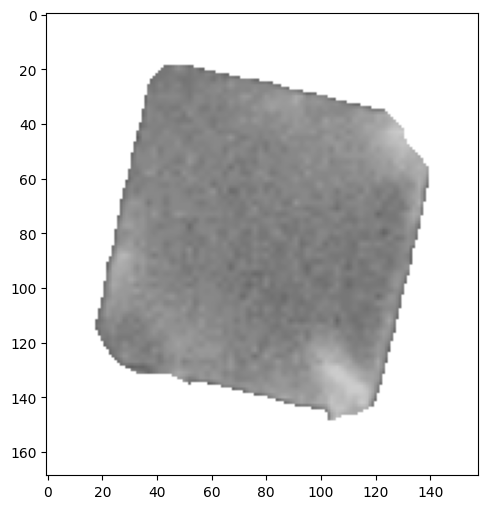

<Figure size 640x480 with 0 Axes>

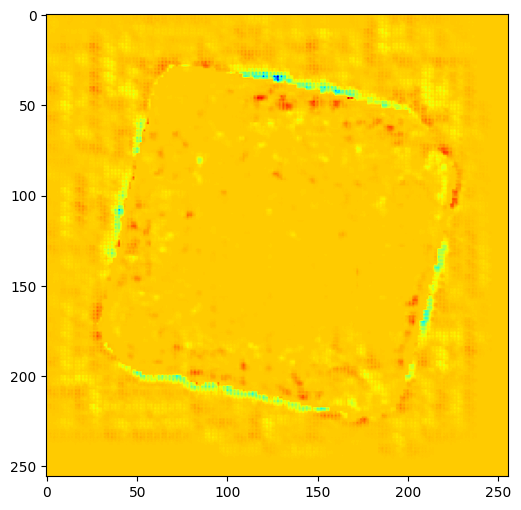

<Figure size 640x480 with 0 Axes>

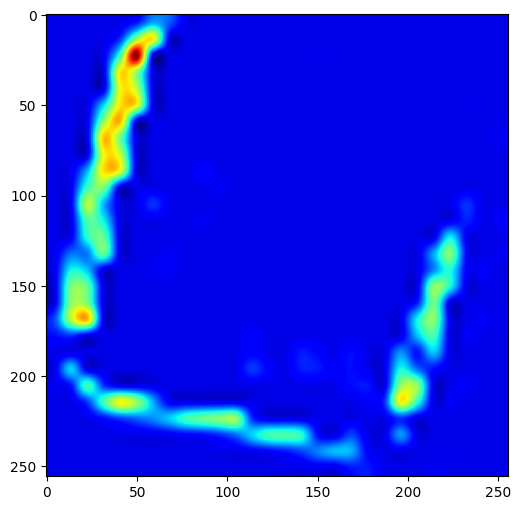

In [ ]:
result, img = testing_image("/content/drive/My Drive/to_predict/extracted_np2.png",model)
show_xplique(model,img , 0,6,1)
print(class_labels)


1/1 [==============================] - 0s 25ms/step
[[1.0000000e+00 4.3244339e-11 1.1888169e-37 3.4129863e-17 5.1519789e-16
  1.2222655e-12]]


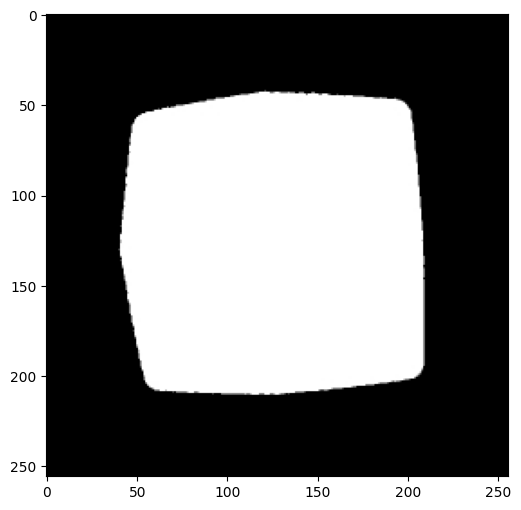

<Figure size 640x480 with 0 Axes>

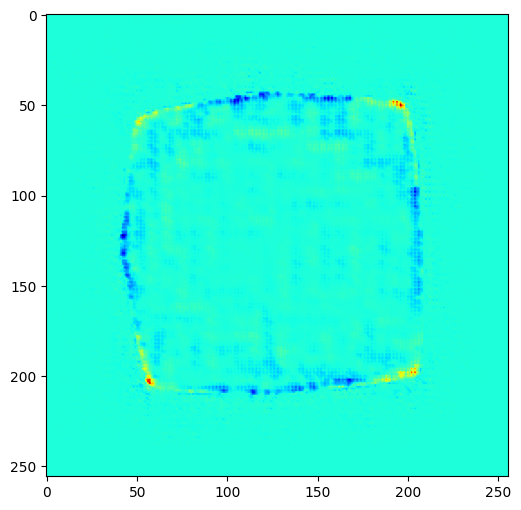

<Figure size 640x480 with 0 Axes>

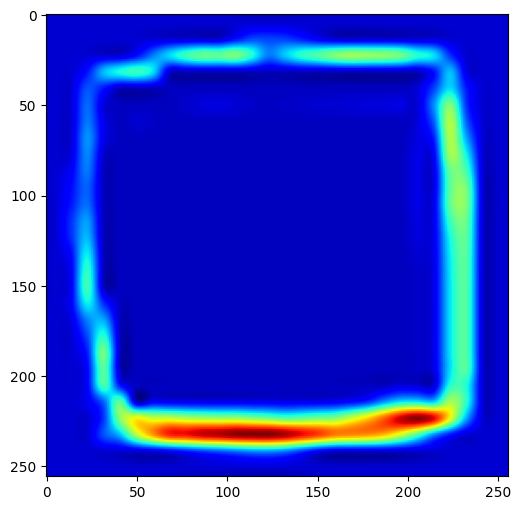

In [ ]:
result, img = testing_image("/content/drive/My Drive/to_predict/001-CUBO-Pt5083-11shells_BW-000169.jpg",model)
show_xplique(model,img , 0,6,1)

1/1 [==============================] - 0s 26ms/step
[[9.6286443e-14 1.0091930e-16 1.3966228e-22 1.0000000e+00 1.0668007e-20
  9.8416546e-17]]


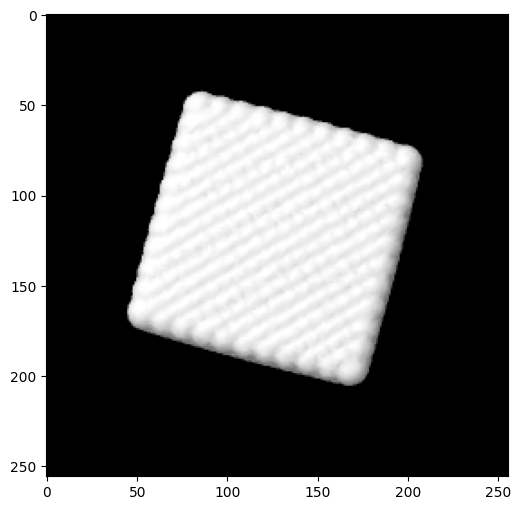

<Figure size 640x480 with 0 Axes>

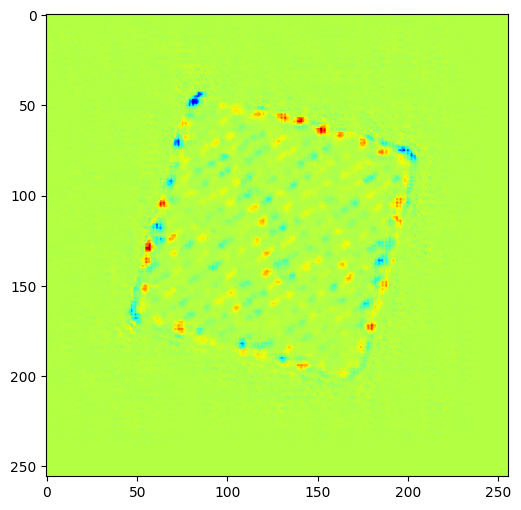

<Figure size 640x480 with 0 Axes>

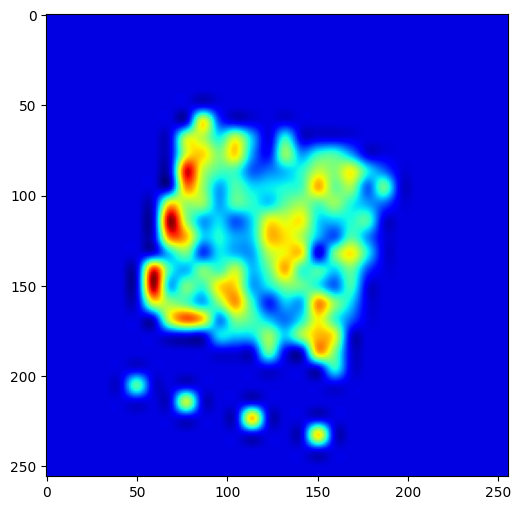

In [ ]:
result, img = testing_image("/content/drive/My Drive/to_predict/003-FCC_CUBE-Pt4631-9x9x9-000138.jpg",model)
show_xplique(model,img , 3,6,1)

In [ ]:
model.save('Model_256x256x1_IMGDB_8_classes.h5')

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [ ]:
from google.colab import files
files.download('Model_256x256x1_IMGDB_8_classes.h5')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>